<a href="https://colab.research.google.com/github/shadab77/DNN/blob/main/CNN_on_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df_np = df.to_numpy()
X, Y = df_np[:, :-1], df_np[:, -1:]
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.10) 

print(train_x.shape), print(test_x.shape)
print(train_y.shape), print(test_y.shape)

(455, 13)
(51, 13)
(455, 1)
(51, 1)


(None, None)

In [12]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=2,
                      activation="relu",
                      input_shape=(train_x.shape[1], 1)),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12352     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [14]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=4, verbose=1)

Epoch 1/100
114/114 [==============================] - 1s 3ms/step - loss: 102.3355 - val_loss: 125.1979
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 73.1103 - val_loss: 69.2821
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 70.5049 - val_loss: 78.2234
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 66.0301 - val_loss: 69.8602
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 67.5629 - val_loss: 77.9330
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 65.0753 - val_loss: 79.6120
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 63.4323 - val_loss: 65.9803
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 68.1356 - val_loss: 67.6314
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 70.8714 - val_loss: 68.8439
Epoch 10/100
114/114 [==============================] - 0s 2ms/step - l

In [15]:
acc_tr = model.evaluate(train_x, train_y)
acc_te = model.evaluate(test_x, test_y)
print(acc_tr, acc_te)

2/2 [==============================] - 0s 5ms/step - loss: 15.2916
16.35123062133789 15.291621208190918


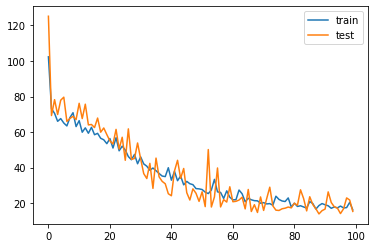

In [16]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [17]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=4, verbose=1, callbacks=[es])

Epoch 1/100
114/114 [==============================] - 0s 2ms/step - loss: 19.8232 - val_loss: 24.3773
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 20.7801 - val_loss: 16.2647
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 18.2991 - val_loss: 21.8066
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 16.1733 - val_loss: 23.5502
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 14.6220 - val_loss: 19.0730
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 17.8517 - val_loss: 11.9415
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 15.0969 - val_loss: 16.7565
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 17.7904 - val_loss: 25.1817
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 16.9266 - val_loss: 16.3174
Epoch 10/100
114/114 [==============================] - 0s 2ms/step - los

In [18]:
acc_tr = model.evaluate(train_x, train_y)
acc_te = model.evaluate(test_x, test_y)
print(acc_tr, acc_te)

2/2 [==============================] - 0s 6ms/step - loss: 17.3939
11.893951416015625 17.39388656616211


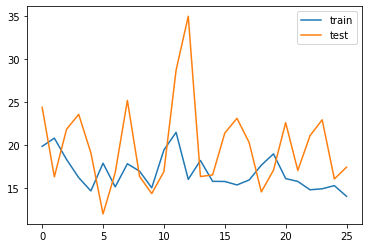

In [19]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()